对于简单的模型 可以用随机梯度下降来找到权重w
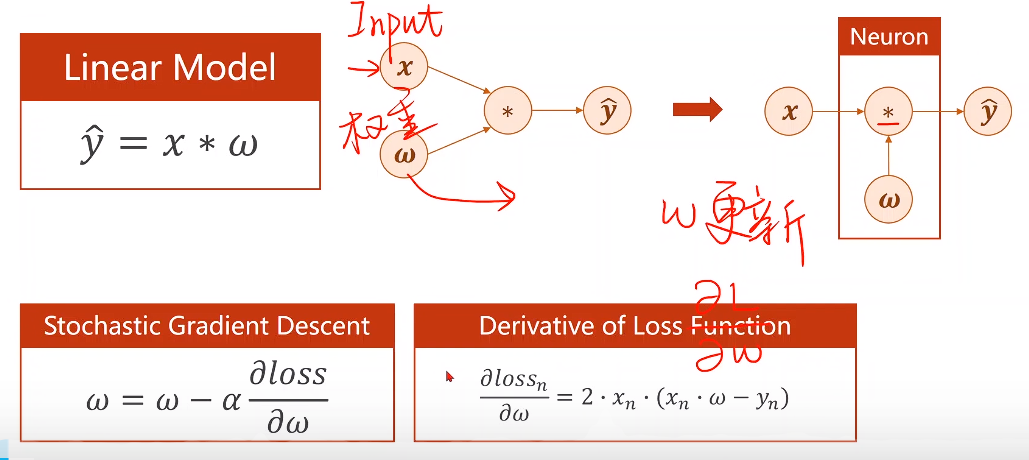

复杂的情况下 有可能有多个权重w 下图有可能有30个权重 不可能用写解析式的方式得到权重
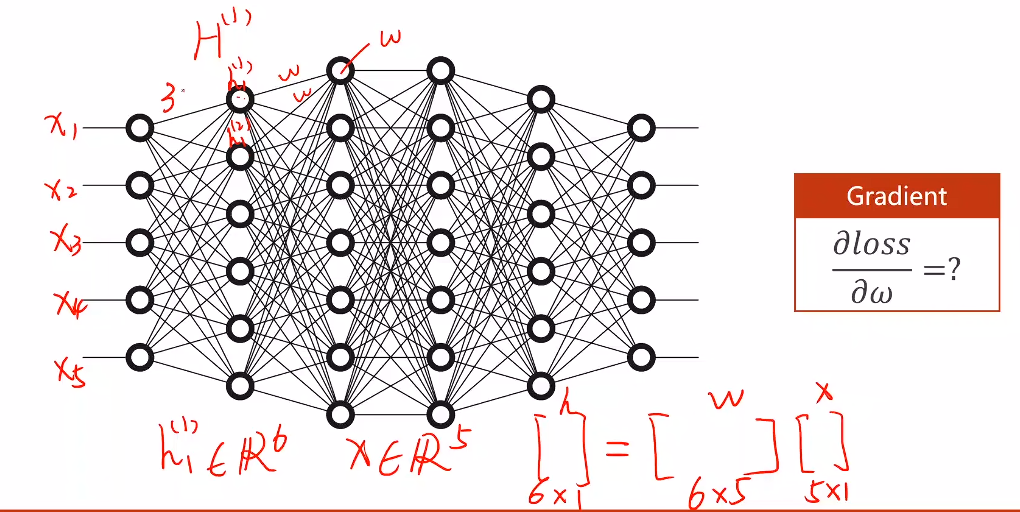

# 计算图
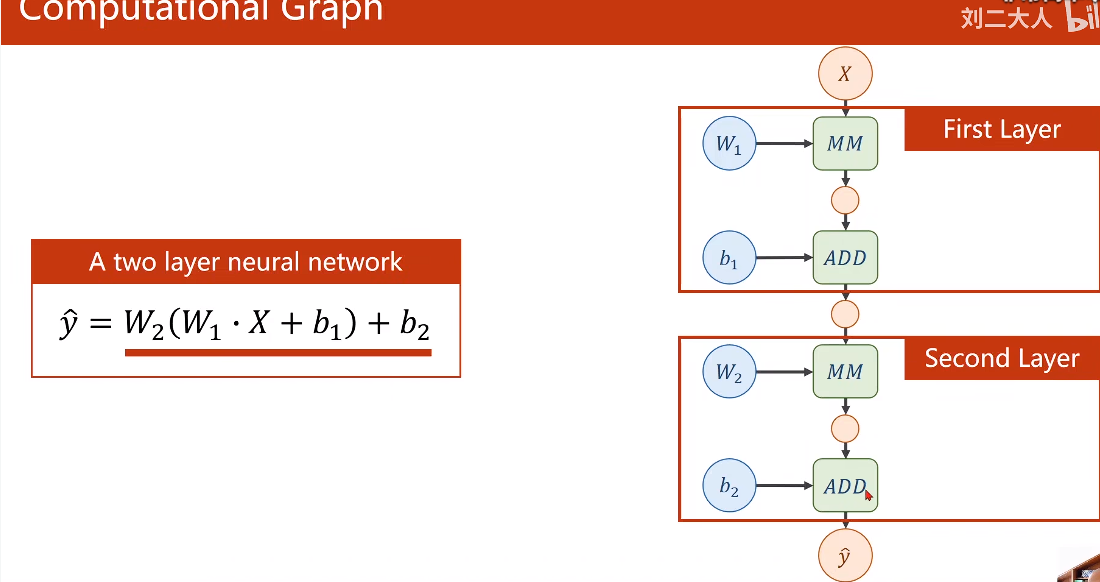

不能进行化简 化简后又变成了线性模型 使得多个权重都只变成了一个权重 则必须引入激活函数
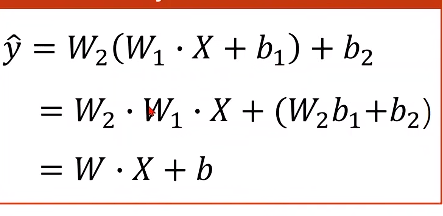

对每一层的最终输出加一个非线性的变化函数 使张量中的每一个值都进行一次非线性变换
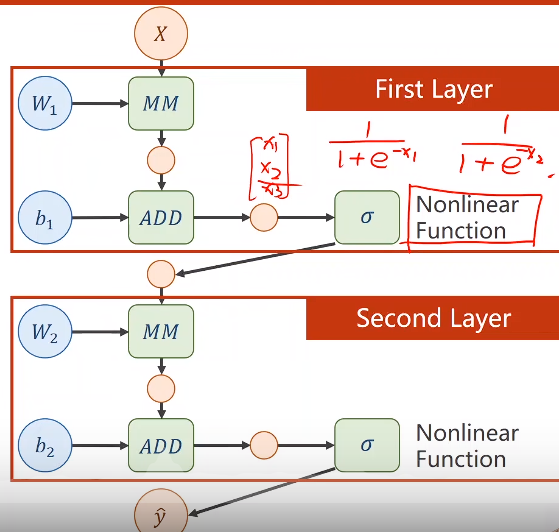

链式法则
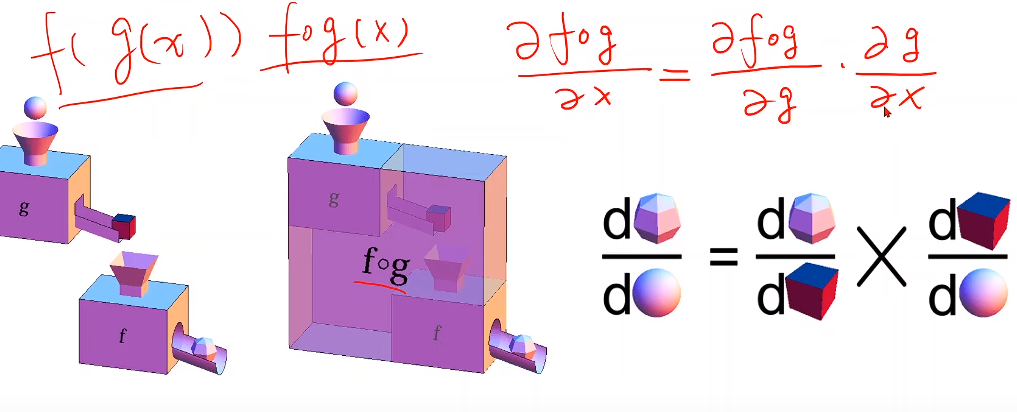

# 反向传播过程

1.先进行求计算图
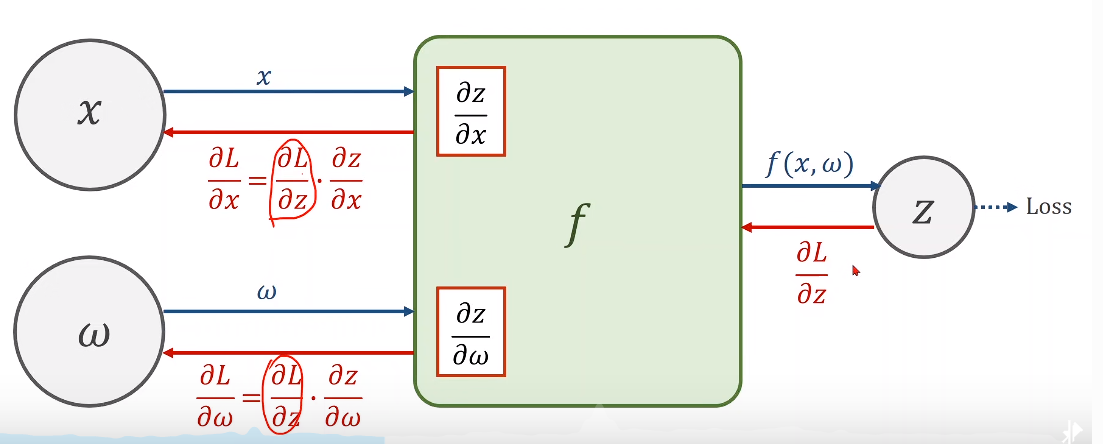

具体的例子
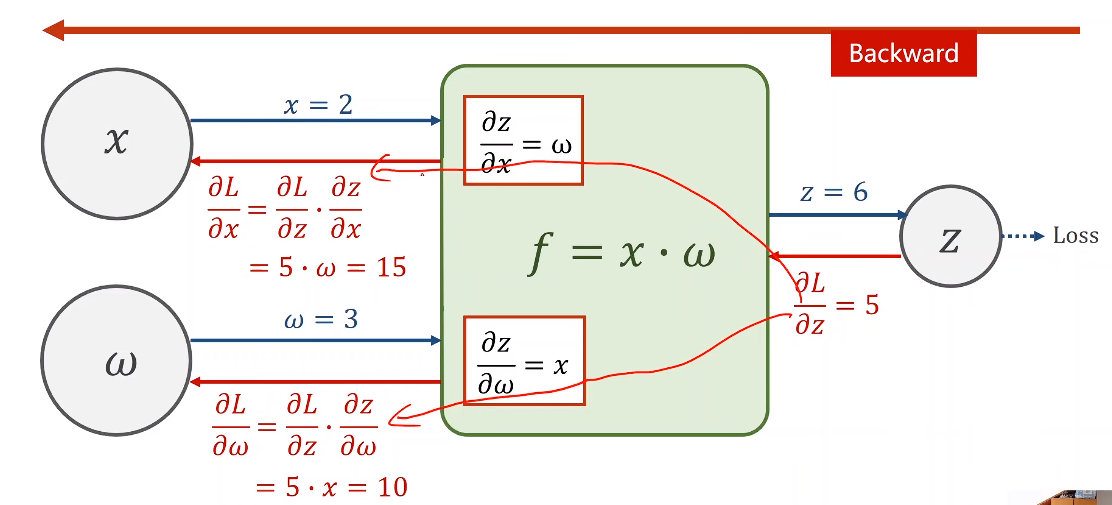

反向传播后对权重w进行更新

先走前馈的过程 再走反向的过程
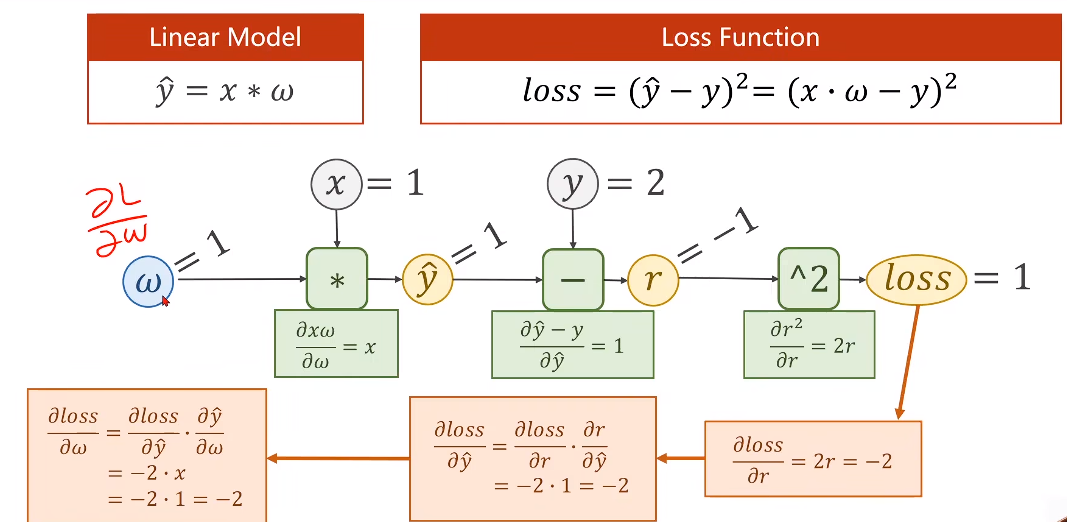

# 在pytorch中怎么进行前馈和反馈的过程

1.pytorch中数据存入Tensor中  Data表示权重的值 Grad表示损失函数对权重的导数

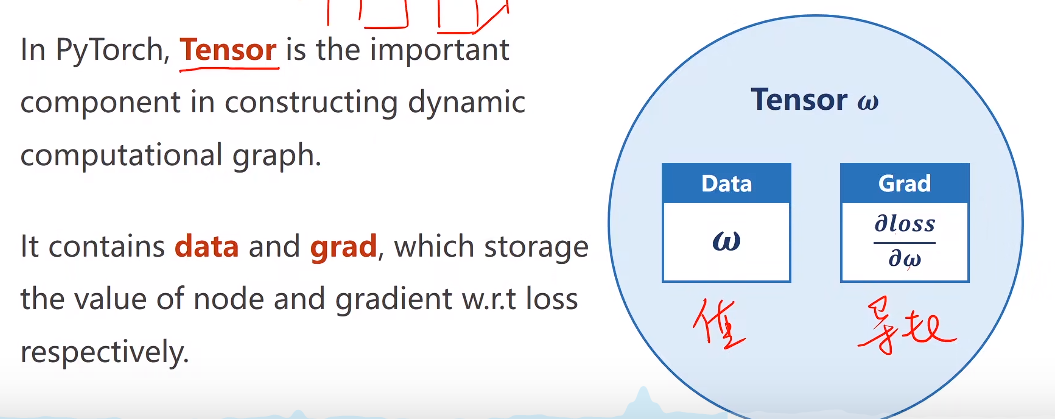

定义的Tensor+计算图就可以得到一个线性模型

In [8]:
import torch

In [9]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

In [10]:
w = torch.Tensor([1.0]) #设w的初值为1.0
w.requires_grad = True #设w是需要计算梯度的

In [11]:
def forward(x):
    return x * w

In [16]:
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

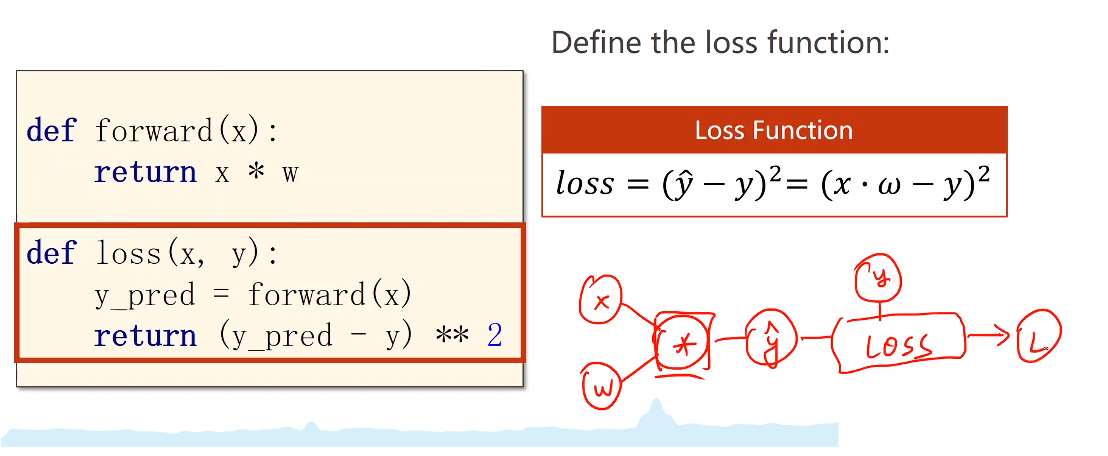

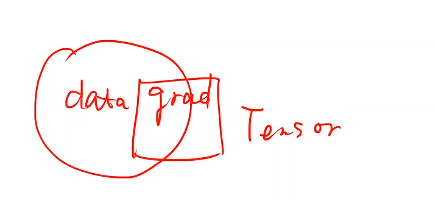

In [24]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]
w = torch.Tensor([1.0]) #设w的初值为1.0
w.requires_grad = True #设w是需要计算梯度的
print("predict (before training)", 4, forward(4).item())
for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l = loss(x,y)#每一个样本进行计算loss 是前馈的过程
        l.backward()#会自动进行反馈的过程 并把梯度存入w之中 此时该计算图会被销毁 因为
        #可能每次运行计算图都不同
        print('\tgrad:',x,y,w.grad.item())
        #应用梯度下降算法来对权重进行更新
        w.data = w.data - 0.01 * w.grad.data#w.grad.data取梯度导数的data
        w.grad.data.zero_()#将上一次梯度记录清空
    print("progress:",epoch,l.item())# 取出loss使用l.item，不要直接使用l（l是tensor会构建计算图）
print("predict (before training)", 4, forward(4).item())

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.

# 手动推导线性模型 y=w*x+b，损失函数loss=(ŷ-y)²下，当数据集x=1,y=2的时候，反向传播的过程。

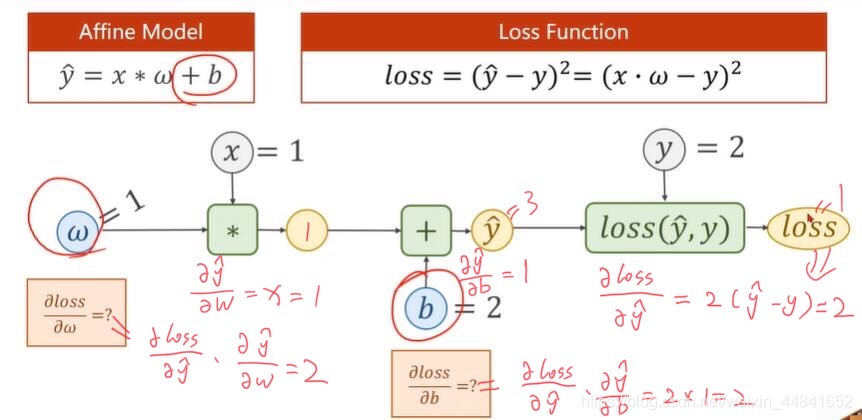

# y=w1x²+w2x+b，损失函数loss=(ŷ-y)²的计算图，并且手动推导反向传播的过程，最后用pytorch的代码实现。

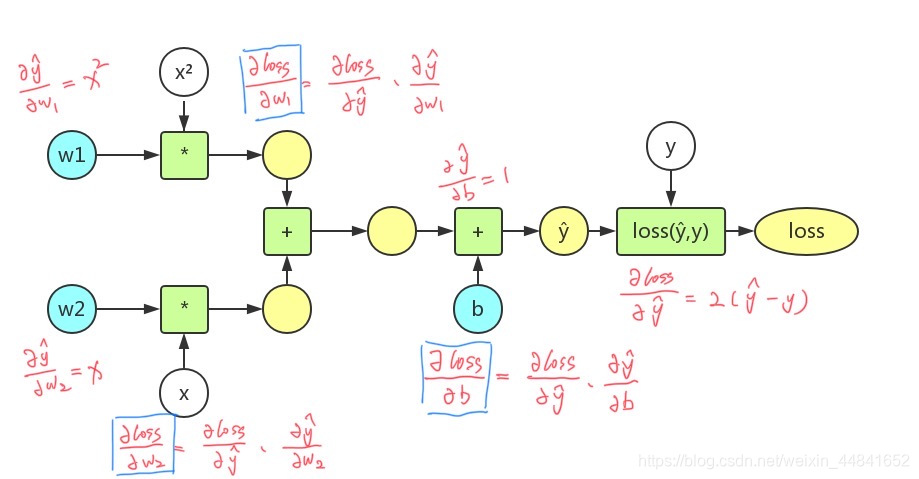

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [26]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

In [29]:
w1 = torch.Tensor([1.0])#初始权值
w1.requires_grad = True#计算梯度，默认是不计算的
w2 = torch.Tensor([1.0])
w2.requires_grad = True
b = torch.Tensor([1.0])
b.requires_grad = True

In [30]:
def forward(x):
    return w1 * x**2 + w2 * x + b

In [31]:
def loss(x,y):#构建计算图
    y_pred = forward(x)
    return (y_pred-y) **2

In [33]:
print('Predict (befortraining)',4,forward(4))
for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l = loss(x,y)
        l.backward()
        print("\tgrad:",x,y,w1.grad.item(),w2.grad.item(),b.grad.item())
        w1.data = w1.data - 0.01*w1.grad.data #注意这里的grad是一个tensor，所以要取他的data
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data
        w1.grad.data.zero_()#将上一次梯度记录清空
        w2.grad.data.zero_()#将上一次梯度记录清空
        b.grad.data.zero_()#将上一次梯度记录清空
    print('Epoch:',epoch,l.item())
print('Predict(after training)',4,forward(4).item())

Predict (befortraining) 4 tensor([21.], grad_fn=<AddBackward0>)
	grad: 1.0 2.0 2.0 2.0 2.0
	grad: 2.0 4.0 22.880001068115234 11.440000534057617 5.720000267028809
	grad: 3.0 6.0 77.04720306396484 25.682401657104492 8.560800552368164
Epoch: 0 18.321826934814453
	grad: 1.0 2.0 -1.1466078758239746 -1.1466078758239746 -1.1466078758239746
	grad: 2.0 4.0 -15.536651611328125 -7.7683258056640625 -3.8841629028320312
	grad: 3.0 6.0 -30.432214736938477 -10.144071578979492 -3.381357192993164
Epoch: 1 2.858394145965576
	grad: 1.0 2.0 0.3451242446899414 0.3451242446899414 0.3451242446899414
	grad: 2.0 4.0 2.4273414611816406 1.2136707305908203 0.6068353652954102
	grad: 3.0 6.0 19.449920654296875 6.483306884765625 2.161102294921875
Epoch: 2 1.1675907373428345
	grad: 1.0 2.0 -0.32242679595947266 -0.32242679595947266 -0.32242679595947266
	grad: 2.0 4.0 -5.845773696899414 -2.922886848449707 -1.4614434242248535
	grad: 3.0 6.0 -3.8828859329223633 -1.294295310974121 -0.43143177032470703
Epoch: 3 0.0465333424

	grad: 3.0 6.0 1.4509849548339844 0.4836616516113281 0.16122055053710938
Epoch: 92 0.00649801641702652
	grad: 1.0 2.0 0.31499528884887695 0.31499528884887695 0.31499528884887695
	grad: 2.0 4.0 -1.7440509796142578 -0.8720254898071289 -0.43601274490356445
	grad: 3.0 6.0 1.4478435516357422 0.48261451721191406 0.1608715057373047
Epoch: 93 0.0064699104987084866
	grad: 1.0 2.0 0.3153109550476074 0.3153109550476074 0.3153109550476074
	grad: 2.0 4.0 -1.7415199279785156 -0.8707599639892578 -0.4353799819946289
	grad: 3.0 6.0 1.4447879791259766 0.4815959930419922 0.16053199768066406
Epoch: 94 0.006442630663514137
	grad: 1.0 2.0 0.31560707092285156 0.31560707092285156 0.31560707092285156
	grad: 2.0 4.0 -1.7390518188476562 -0.8695259094238281 -0.43476295471191406
	grad: 3.0 6.0 1.4418182373046875 0.4806060791015625 0.1602020263671875
Epoch: 95 0.006416172254830599
	grad: 1.0 2.0 0.3158855438232422 0.3158855438232422 0.3158855438232422
	grad: 2.0 4.0 -1.7366409301757812 -0.8683204650878906 -0.434160